In [156]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [157]:
df = pd.read_csv('house-prices-datasets/train.csv')

In [158]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [159]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [160]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [161]:
Columns = df.columns
print(Columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [162]:
Y = df['SalePrice']

In [163]:
features = df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'TotRmsAbvGrd']]

In [164]:
features.head()

,GrLivArea,BedroomAbvGr,FullBath,HalfBath,TotRmsAbvGrd
0,1710,3,2,1,8
1,1262,3,2,0,6
2,1786,3,2,1,6
3,1717,3,1,0,7
4,2198,4,2,1,9


In [165]:
features.isnull().sum()

GrLivArea       0
BedroomAbvGr    0
FullBath        0
HalfBath        0
TotRmsAbvGrd    0
dtype: int64

In [166]:
features.dtypes

GrLivArea       int64
BedroomAbvGr    int64
FullBath        int64
HalfBath        int64
TotRmsAbvGrd    int64
dtype: object

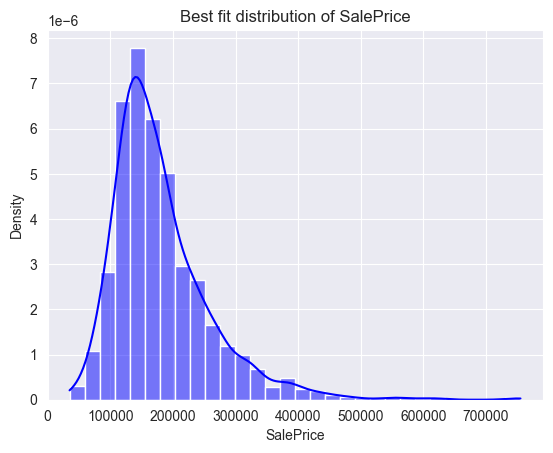

In [167]:
plt.title('Best fit distribution of SalePrice')
sns.histplot(Y, kde=True, stat='density', color='blue', bins=30)

plt.show()

Left Skewed dataset

As we can see the data is left skewed which means than most houses have lower sale prices, and there are a few houses with very high sale prices.

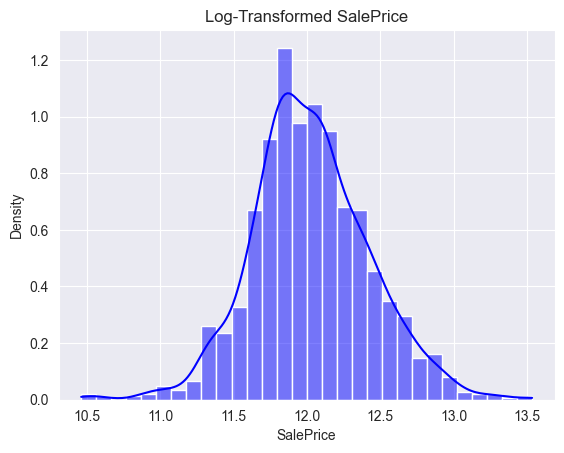

In [168]:
# Log transformation
y_log = np.log1p(Y)
df['y_log'] = y_log

# Plot the transformed data
plt.title('Log-Transformed SalePrice')
sns.histplot(y_log, kde=True, stat='density', color='blue', bins=30)
plt.show()

In [169]:
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'TotRmsAbvGrd']

test_normality = lambda x: stats.shapiro(x.fillna(0))[1] < 0.01
normal = pd.DataFrame(df[features])
normal = normal.apply(test_normality)
print(normal.all())

True


Since, the Result is False at least one of the features have failed the normality test here

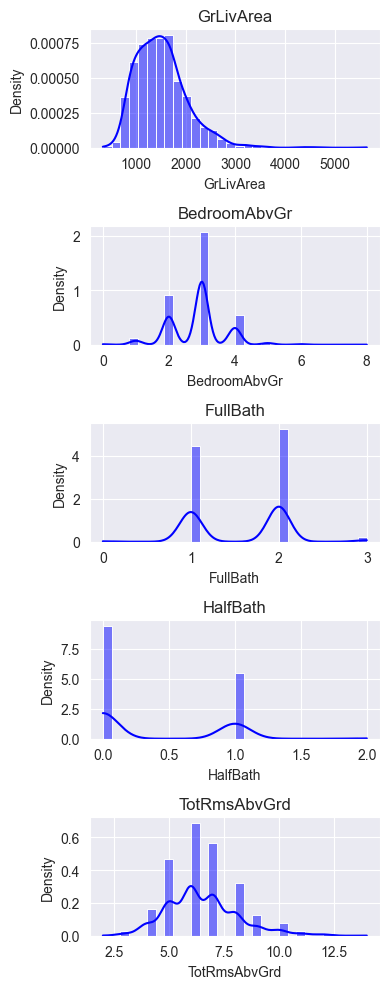

In [170]:
fig, axes = plt.subplots(nrows=len(features), ncols=1, figsize=(4, 2 * len(features)))

# Plot histograms for each feature
for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, stat='density', color='blue', bins=30, ax=axes[i])
    axes[i].set_title(feature)

plt.tight_layout()
plt.show()

From above we can see the Total Living Area is the one that don't have the normal distribution so we use the log transformation in the data

In [171]:
GrLivArea_log = np.log1p(df['GrLivArea'])
df['GrLivArea_log'] = GrLivArea_log

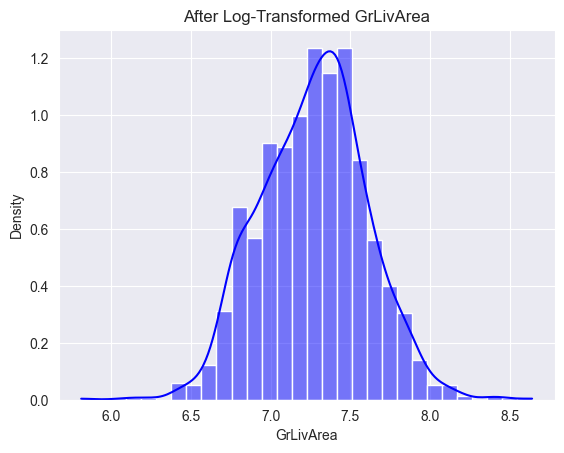

In [172]:
plt.title('After Log-Transformed GrLivArea')
sns.histplot(GrLivArea_log, kde=True, stat='density', color='blue', bins=30)

plt.show()

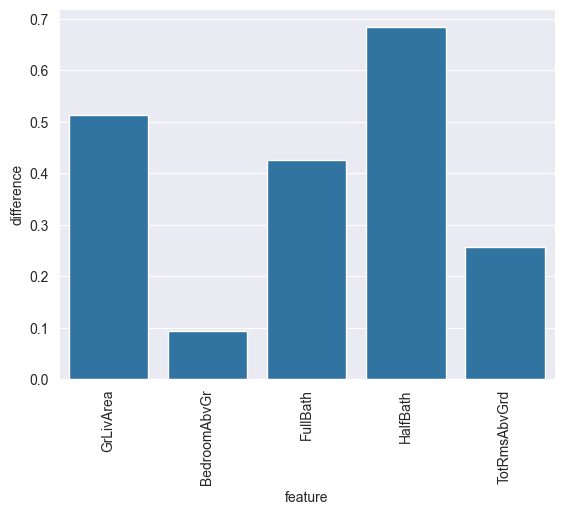

In [173]:
standard = df[df['SalePrice'] < 200000]
pricey = df[df['SalePrice'] >= 200000]

diff = pd.DataFrame()
diff['feature'] = features
diff['difference'] = [(pricey[f].fillna(0.).mean() - standard[f].fillna(0.).mean())/(standard[f].fillna(0.).mean())
                      for f in features]

sns.barplot(data=diff, x='feature', y='difference')
x=plt.xticks(rotation=90)

Here all the relative mean differences are above zero, it indicates that, on average, the selected features have higher mean values in the 'pricey' subset (where 'SalePrice' is greater than or equal to 200,000) compared to the 'standard' subset (where 'SalePrice' is less than 200,000).

In [174]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score

In [175]:
features = df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'TotRmsAbvGrd']]
target = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
print(f'R2-squared: {r2}')

Mean Squared Error: 2809126045.9448566
Root Mean Squared Error: 53001.18909934811
R2-squared: 0.633767069344105


Above one's is the one without the Feature Engineering and using that without any sorts of the transformations and anything

In [176]:
features = df[['GrLivArea_log', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'TotRmsAbvGrd']]
target = df['y_log']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')
print(f'R2-squared: {r2}')

Mean Squared Error: 0.06774448143042594
Root Mean Squared Error: 0.260277700601542
R2-squared: 0.6369748537176556


This one is the one we use after the log transformation to handle the left skewed distribution of the features and the target variable

Text(0.5, 1.0, 'Linear Regression Model')

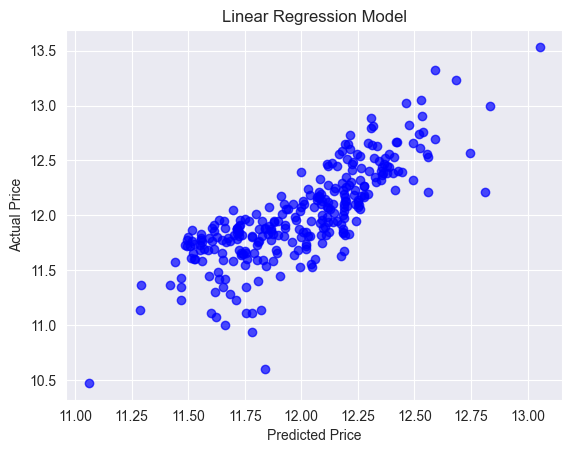

In [177]:
plt.scatter(y_pred, y_test, alpha = 0.7, color = 'b')
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')

Using Test Dataset

In [178]:
test_df = pd.read_csv('house-prices-datasets/test.csv')

In [179]:
features = df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'TotRmsAbvGrd']]

In [180]:
GrLivArea_log = np.log1p(test_df['GrLivArea'])
test_df['GrLivArea_log'] = GrLivArea_log

In [181]:
test_features = test_df[['GrLivArea_log', 'BedroomAbvGr', 'FullBath', 'HalfBath', 'TotRmsAbvGrd']]

In [182]:
test_predictions = model.predict(test_features)

During the training phase, we have applied the logarithmic transformation to the target variable
The linear regression model was then trained on the features and the logarithmically transformed target variable.
When making predictions on the test set, the predictions are in the logarithmic scale.
To obtain predictions in the original scale (dollars), we can apply the inverse of the logarithmic transformation

In [183]:
predictions = np.exp(test_predictions)

In [184]:
print(predictions)

[112784.44857209 144780.40451921 202144.39094689 ... 114331.17419537
 106187.3584847  231995.11480929]


In [185]:
submission = pd.DataFrame()

In [186]:
test_df['SalePrice'] = predictions

In [187]:
submission['SalePrice'] = predictions

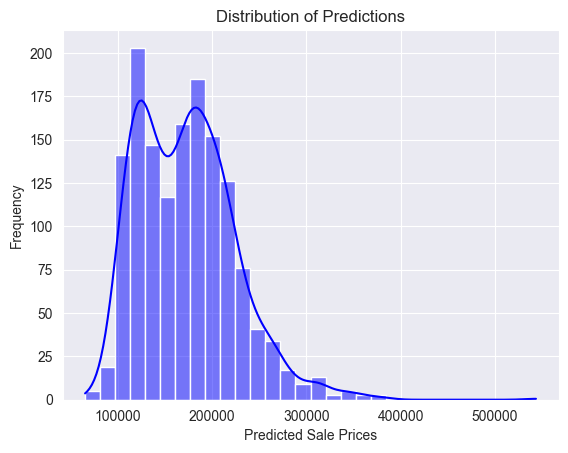

In [188]:
sns.histplot(predictions, kde=True, color='blue', bins=30)
plt.title('Distribution of Predictions')
plt.xlabel('Predicted Sale Prices')
plt.ylabel('Frequency')
plt.show()

In [189]:
submission.to_csv('submission.csv', index = False)

In [190]:
submission.head()

,SalePrice
0,112784.448572
1,144780.404519
2,202144.390947
3,196653.917822
4,180056.417948


In [191]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GrLivArea_log,SalePrice
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,NaN,MnPrv,NaN,0,6,2010,WD,Normal,6.799056,112784.448572
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,Gar2,12500,6,2010,WD,Normal,7.192934,144780.404519
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,NaN,MnPrv,NaN,0,3,2010,WD,Normal,7.396335,202144.390947
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,NaN,NaN,NaN,0,6,2010,WD,Normal,7.380879,196653.917822
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,NaN,NaN,NaN,0,1,2010,WD,Normal,7.155396,180056.417948
